<a href="https://colab.research.google.com/github/Aayush3466/NeuralNetwork/blob/main/batchnormalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#importing
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Dense, Conv2D, MaxPooling2D,Flatten, Dropout,
                                     BatchNormalization)

import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import numpy as np
%matplotlib inline

In [27]:
#network para

NUM_CLASSES = 10

#reshaping 28x28 pixel images to flatten of 784 pixels
RESHAPED = 784

#number of neurons in a hidden layer
HIDDEN_NEURONS= 256

IMG_ROWS , IMG_COLS = 28 , 28 #imput image dimensions

 #for color we type 3 chanel

INPUT_SHAPE=(IMG_ROWS, IMG_COLS, 1)

In [28]:
#laoding the dataset
fashion_data = tf.keras.datasets.fashion_mnist

#splitting between 60,000 train and 10,000 test spamples

(train_images, train_labels), (test_images, test_labels) = fashion_data.load_data()

train_images = train_images.reshape(60000, IMG_ROWS, IMG_COLS,1)
test_images = test_images.reshape(10000, IMG_ROWS,IMG_COLS,1)

train_images, test_images = train_images/255.0, test_images/255.0




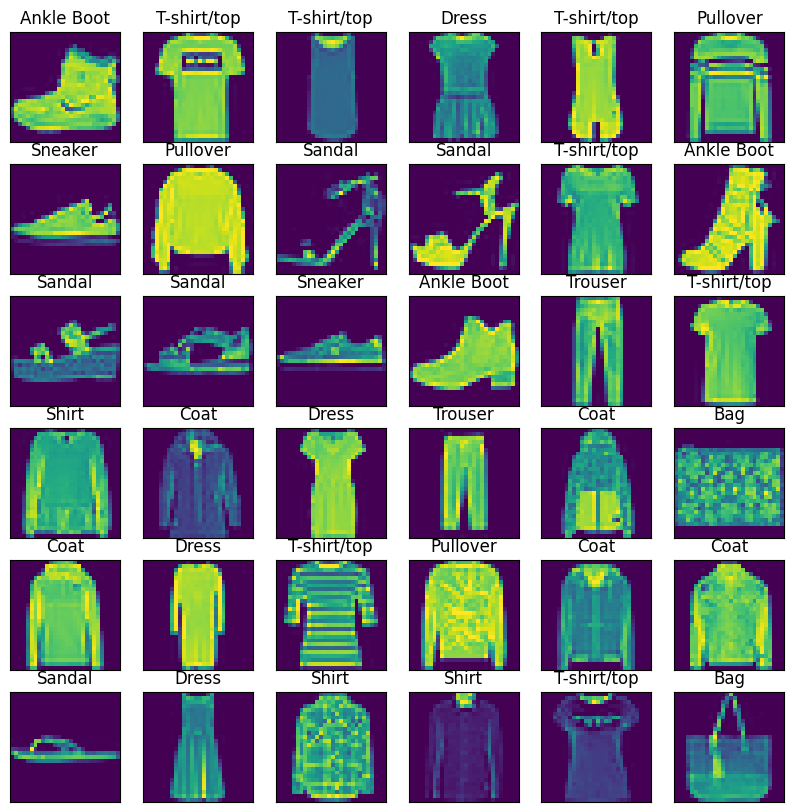

In [29]:
#create a  dictionary for each type of label

labels = {0: "T-shirt/top", 1: "Trouser", 2:"Pullover",3:"Dress", 4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",
          8:"Bag",9:"Ankle Boot"}

plt.figure(figsize=(10,10))
for i in range(36):
  plt.subplot(6,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i].reshape((IMG_ROWS,IMG_COLS)))
  label_index=train_labels[i]
  plt.title(labels[label_index])
plt.show()

In [30]:
#one hot representation of labels

train_labels = tf.keras.utils.to_categorical(train_labels, NUM_CLASSES)
test_labels = tf.keras.utils.to_categorical(test_labels, NUM_CLASSES)

In [31]:
#defining the architecture of models

class cnn_fmnist:
  @staticmethod
  def build(input_shape, classes, use_l2_reg=False, l2_loss_lambda=0.00025):

    l2 = regularizers.l2(l2_loss_lambda) if use_l2_reg else None
    #printing this as we cannot visualize l2 normalization
    if l2 is not None: print('using l2 regularization %.6f' %l2_loss_lambda)

    model= Sequential([

        Conv2D(32, kernel_size=(3,3), activation='relu', padding='same',
               kernel_regularizer=l2, input_shape=input_shape),
        BatchNormalization(),

        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.15),



        Conv2D(64, kernel_size=(3,3), activation='relu', padding='same',
               kernel_regularizer=l2),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.2),



        Conv2D(128, kernel_size=(3,3), activation='relu', padding='same',
               kernel_regularizer=l2),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.3),


        Flatten(),
        Dropout(0.4),

        Dense(1024,activation='relu', kernel_regularizer=l2),
        Dropout(0.4),

        Dense(512, activation='relu', kernel_regularizer=l2),
        Dropout(0.2),

        Dense(NUM_CLASSES,activation='softmax')



    ])
    return model

In [32]:
#initial optimizer

model= cnn_fmnist.build(input_shape= INPUT_SHAPE, classes = NUM_CLASSES,
                        use_l2_reg=True)

adam = Adam(learning_rate=0.0001)

#compile the model
model.compile(optimizer=adam, loss= 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

using l2 regularization 0.000250
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_3 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_

In [33]:
#trainning the model

BATCH_SIZE = 128
EPOCHS = 50
VALIDATION_SPLIT = 0.2 #how much of the training set is reserved for validation


In [ ]:
history=model.fit(train_images, train_labels, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_split = VALIDATION_SPLIT)

Epoch 1/50
375/375 [==============================] - 155s 393ms/step - loss: 1.7268 - accuracy: 0.5851 - val_loss: 2.0641 - val_accuracy: 0.4445
Epoch 2/50
248/375 [==================>...........] - ETA: 41s - loss: 1.2352 - accuracy: 0.7151

In [ ]:
score = model.evaluate(test_images, test_labels)
print("\n Testscore: ", score[0])
print('Test accuracy: ', score[1])


In [ ]:
#plot the loss and accuracy functions for the training and validation sets

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(history.history['loss'],label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training- Loss Function')

plt.subplot(2,2,2)
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'], label= 'Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [ ]:
#get the predictions for the test data , convert to an integer cvalue between 0 and 9

predicted_classes = np.around(model.predict(test_images))
predicted_classes= np.argmax(predicted_classes,axis=1)

#get the indeces to be plotted
if test_labels.ndim==2:
  test_labels = np.argmax(test_labels,axis=1)

correct = np.nonzero(predicted_classes==test_labels)[0]
incorrect = np.nonzero(predicted_classes!= test_labels)[0]

In [ ]:
#correctly predicted
plt.figure(figsize=(15,15))
for i, indx in enumerate(correct[:16]):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[indx].reshape((IMG_ROWS,IMG_COLS)),cmap="Greens")
  label_index=train_labels[indx]
  plt.title("True:{}  Pred:{}".format(labels[test_labels[indx]],labels[predicted_classes[indx]]))
plt.show()

In [ ]:
#incorrectly predicted

plt.figure(figsize=(15,15))
for i, indx in enumerate(incorrect[:16]):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[indx].reshape((IMG_ROWS,IMG_COLS)),cmap="Reds")
  label_index=train_labels[indx]
  plt.title("True:{}  Pred:{}".format(labels[test_labels[indx]],labels[predicted_classes[indx]]))
plt.show()